## Create the network with same structure

Concept statue for node 1 in graph_1 is: False
[(0, {'concept1': False}), (1, {'concept1': False}), (2, {'concept1': False}), (3, {'concept1': False}), (4, {'concept1': False}), (5, {'concept1': False}), (6, {'concept1': False}), (7, {'concept1': False}), (8, {'concept1': False}), (9, {'concept1': False})]
[(0, {'concept2': False}), (1, {'concept2': False}), (2, {'concept2': False}), (3, {'concept2': False}), (4, {'concept2': False}), (5, {'concept2': False}), (6, {'concept2': False}), (7, {'concept2': False}), (8, {'concept2': False}), (9, {'concept2': False})]
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 6), (0, 7), (0, 8), (0, 9), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (7, 8), (7, 9), (8, 9)]
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 6), (0, 7), (0, 8), (0, 9), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8

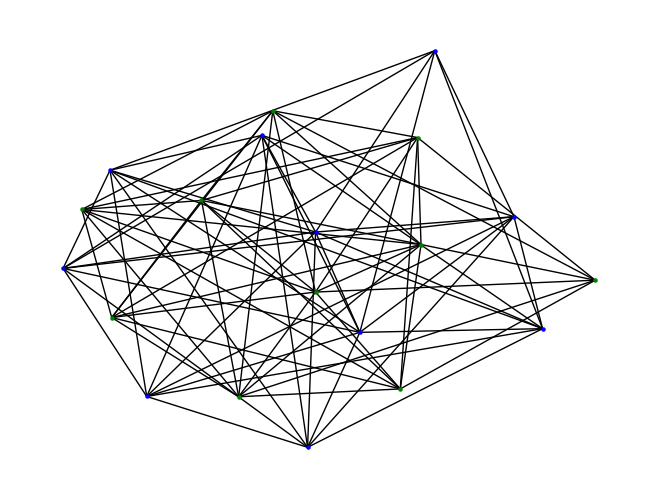

In [3]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# Create the base graph
base_graph = nx.fast_gnp_random_graph(n=10, p=0.8)

# Create graph1 by copying the base graph
g1 = base_graph.copy()

# Create graph2 by copying the base graph
g2 = base_graph.copy()

# Add the concept1 attribute to each node in graph1
concept1_attribute = False
nx.set_node_attributes(g1, concept1_attribute, name='concept1')

# Add the concept2 attribute to each node in graph2
concept2_attribute = False
nx.set_node_attributes(g2, concept2_attribute, name='concept2')

# Access and print the concept attribute of the node
print("Concept statue for node 1 in graph_1 is:", g1.nodes[1]['concept1'])
print(g1.nodes(data=True))
print(g2.nodes(data=True))
print(g1.edges())
print(g2.edges())

# Draw these two graphs
nx.draw(g1, node_color='blue', node_size=5)
nx.draw(g2, node_color='green', node_size=5)

## Add concept and it's status 

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import random

In [5]:
# Model selection
model = ep.IndependentCascadesModel(g1)

# Model Configuration
config = mc.Configuration()
#config.add_model_parameter('fraction_infected', 0.008)

# Setting the edge parameters
threshold = 0.01
for e in g1.edges():
    config.add_edge_configuration("threshold", e, threshold)


# Generate a random initial set of nodes
num_initial_nodes = 2  # Replace with the desired number of initial nodes
nodes_list = list(g1.nodes())
initial_set = random.sample(nodes_list, num_initial_nodes)

print("Initial seed set randomy generated as:",initial_set)

config.add_model_initial_configuration("Infected", initial_set)
model.set_initial_status(config)

effected_node = []

Initial seed set randomy generated as: [6, 0]


In [6]:
iterations = model.iteration_bunch(1)

print(g1.edges(data=True))
threshold = 0.02

for e in g1.edges():
    g1[e[0]][e[1]]["threshold"] = threshold

[(0, 1, {}), (0, 2, {}), (0, 3, {}), (0, 4, {}), (0, 6, {}), (0, 7, {}), (0, 8, {}), (0, 9, {}), (1, 3, {}), (1, 4, {}), (1, 5, {}), (1, 6, {}), (1, 7, {}), (1, 8, {}), (1, 9, {}), (2, 3, {}), (2, 4, {}), (2, 5, {}), (2, 6, {}), (2, 7, {}), (2, 8, {}), (2, 9, {}), (3, 4, {}), (3, 5, {}), (3, 6, {}), (3, 7, {}), (3, 8, {}), (3, 9, {}), (4, 5, {}), (4, 6, {}), (4, 7, {}), (4, 8, {}), (4, 9, {}), (5, 6, {}), (5, 7, {}), (5, 8, {}), (5, 9, {}), (7, 8, {}), (7, 9, {}), (8, 9, {})]


In [7]:
print(iterations)
print(g1.edges(data=True))

[{'iteration': 0, 'status': {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0}, 'node_count': {0: 8, 1: 2, 2: 0}, 'status_delta': {0: 0, 1: 0, 2: 0}}]
[(0, 1, {'threshold': 0.02}), (0, 2, {'threshold': 0.02}), (0, 3, {'threshold': 0.02}), (0, 4, {'threshold': 0.02}), (0, 6, {'threshold': 0.02}), (0, 7, {'threshold': 0.02}), (0, 8, {'threshold': 0.02}), (0, 9, {'threshold': 0.02}), (1, 3, {'threshold': 0.02}), (1, 4, {'threshold': 0.02}), (1, 5, {'threshold': 0.02}), (1, 6, {'threshold': 0.02}), (1, 7, {'threshold': 0.02}), (1, 8, {'threshold': 0.02}), (1, 9, {'threshold': 0.02}), (2, 3, {'threshold': 0.02}), (2, 4, {'threshold': 0.02}), (2, 5, {'threshold': 0.02}), (2, 6, {'threshold': 0.02}), (2, 7, {'threshold': 0.02}), (2, 8, {'threshold': 0.02}), (2, 9, {'threshold': 0.02}), (3, 4, {'threshold': 0.02}), (3, 5, {'threshold': 0.02}), (3, 6, {'threshold': 0.02}), (3, 7, {'threshold': 0.02}), (3, 8, {'threshold': 0.02}), (3, 9, {'threshold': 0.02}), (4, 5, {'threshold': 0.02}

## Parallel spreading in the IC mode with two network with same structure

In [ ]:
iterations = model.iteration_bunch(1) 

In [ ]:
import multiprocessing as mp

def spread_simulation(graph, initial_node):
    

    return spreading_result

def run_spreading_simulation(graph, initial_node):
    # Run a single spreading simulation for a given source node
    result = spread_simulation(graph, initial_node)
    return result

def parallel_spreading_simulation(graph, initial_nodes, num_processes):
    # Create a multiprocessing Pool with the desired number of processes
    pool = mp.Pool(num_processes)

    # Generate the arguments for each spreading simulation
    arguments = [(graph, node) for node in initial_nodes]

    # Run spreading simulations in parallel
    results = pool.starmap(run_spreading_simulation, arguments)

    # Close the pool to free resources
    pool.close()
    pool.join()

    return results